In [1]:
# Import dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
# Download the model that we trained
model = keras.models.load_model('model.h5')

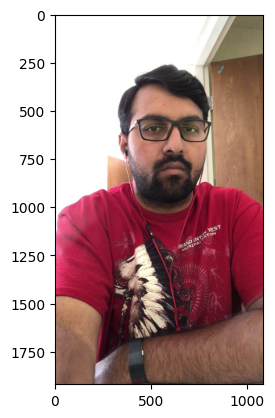

In [5]:
# Look at a test image
img = cv2.imread('test/image__0.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

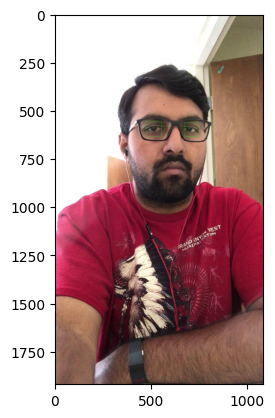

In [7]:
# Get the cascade classifier for the face and eyes
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
# Convert the image to grayscale
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)
  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

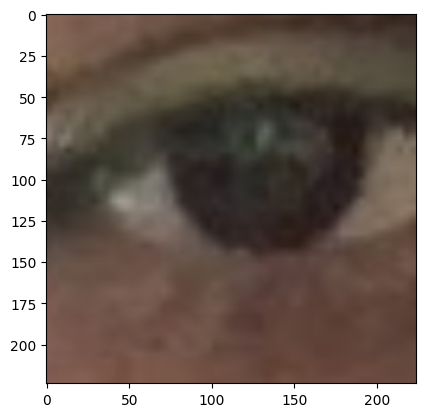

In [44]:
final_img = cv2.resize(eyes_roi, (224,224))

# Plot the image in grayscale
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY), cmap='gray')

final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0



In [22]:
# Save the new model
model.predict(final_img)

1/1 [==============================] - 0s 57ms/step


array([[0.02650694]], dtype=float32)

In [ ]:
# Define the paths to the test data
test_input_path = 'test/'
Classes = ['Closed_Eyes', 'Open_Eyes']
images_size = 224

def create_training_data(training_data, size_of_images=images_size):
    # For each of the categories
    for category in Classes:
        # Get the path to the category
        path = os.path.join(Datadirectory, category)
        
        # Get the index of the class, 0 for closed eyes and 1 for open eyes
        class_index = Classes.index(category)
        
        # For each image first conert it to the size and grayscale, then add it to the training data
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb, (size_of_images, size_of_images))
            training_data.append([new_array, class_index])
            
    return training_data

# Define a function that preprocesses a single image
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [images_size, images_size])
  image /= 255.0  # normalize to [0,1] range
  return image

# Create a function that preprpcesses the image



In [ ]:
test_data = []
# for each picture in the closed dataset
for i in range(0, 100):
  # read the image
  img = tf.io.read_file(test_input_closed + 'image__' + str(i) + '.jpg')
  # preprocess the image
  img = preprocess_image(img)
  # append the image to the test data list
  test_data.append(img)


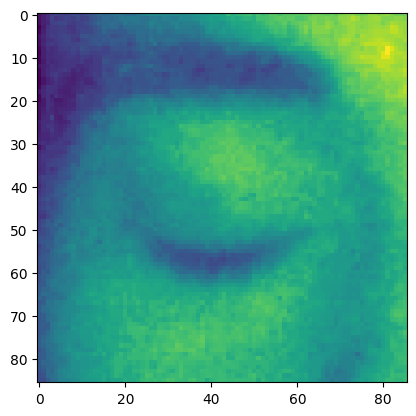

In [27]:
# Get the first training sample
path = os.path.join("train/Closed_Eyes/")

img_array = cv2.imread(os.path.join(path,"s0001_00001_0_0_0_0_0_01.png"), cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array)
# backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
# new_array = cv2.resize(backtorgb, (224, 224))

cv2.imread('train/image__0.jpg')

In [ ]:
model.summary()
